### Dataset
The dataset **"Genere Classification"** that we have taken is from [Kaggle](https://www.kaggle.com/datasets/kristianperriu/genereclassification) which is created by [@perriu](https://www.kaggle.com/kristianperriu) in *Universita di Pavia Italy*. The dataset consist of `10995` samples which contains the lyrics of the song and `4` target class.

#### **Summry**
- **Total Samples:** `10995`
- **Feature:** `lyrics`
- **Traget:** `genere (pop, rap, rock, country)`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Pre-processing

In [ ]:
PATH = "https://gist.githubusercontent.com/d33kshant/acbdcb290e7ea94fa5c83c1c16281b2d/raw/1eba241dd61c23cb035e7f69e8df91bc796ab60a/lyrics-genere-dataset.csv"

songs = pd.read_csv(PATH)
songs.head()

,index,lyrics,genere
0,0,\nyo i never fucked wayne i never fucked drake...,rap
1,1,\nyo b they ready\nlet's go\n\nfeelin' myself ...,rap
2,2,\nuh mmm kyuh\nrip to big \nclassic shit\n\ni'...,rap
3,3,\nyou know yeah\ntouchin' yeah\nnight of\nyou ...,rap
4,4,\nayo look like i'm goin' for a swim\ndunked o...,rap


In [ ]:
songs.sample()["lyrics"]

10750    \ni want you i want you so bad\ni want you i w...
Name: lyrics, dtype: object

In [ ]:
songs = songs[["lyrics", "genere"]]
songs.tail()

,lyrics,genere
10990,\nmonkey see monkey do i don't know why\nwalk ...,rock
10991,\nthey hung him on a cross\nthey hung him on a...,rock
10992,\nclean up before she comes\nclean up before s...,rock
10993,\ni'm not gonna make you groom\nsomewhere else...,rock
10994,\nshake it down easy shake it down sleazy come...,rock


In [ ]:
songs["lyrics"] = songs["lyrics"].str.lower()

In [ ]:
songs["lyrics"] = songs["lyrics"].str.strip()
songs.tail()

,lyrics,genere
10990,monkey see monkey do i don't know why\nwalk ar...,rock
10991,they hung him on a cross\nthey hung him on a c...,rock
10992,clean up before she comes\nclean up before she...,rock
10993,i'm not gonna make you groom\nsomewhere else i...,rock
10994,shake it down easy shake it down sleazy come o...,rock


In [ ]:
songs["lyrics"] = songs["lyrics"].str.replace("\n", " ")
songs["lyrics"] = songs["lyrics"].str.replace(r"[^a-zA-Z]", "")
songs.tail()

,lyrics,genere
10990,monkey see monkey do i don't know why walk aro...,rock
10991,they hung him on a cross they hung him on a cr...,rock
10992,clean up before she comes clean up before she ...,rock
10993,i'm not gonna make you groom somewhere else is...,rock
10994,shake it down easy shake it down sleazy come o...,rock


### Exploratory Data Analysis

In [ ]:
songs.shape

(10995, 2)

In [ ]:
songs['lyrics'].str.split().str.len().describe()

count    10995.000000
mean       343.979445
std        265.943301
min          9.000000
25%        183.000000
50%        285.000000
75%        450.000000
max      12814.000000
Name: lyrics, dtype: float64

In [ ]:
songs["genere"].describe()

count       10995
unique          4
top       country
freq         2920
Name: genere, dtype: object

<Axes: ylabel='genere'>

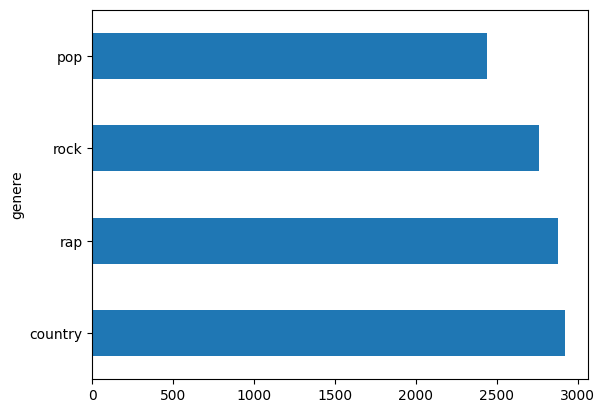

In [ ]:
songs["genere"].value_counts().plot(kind='barh')

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X, y = tfidf_vectorizer.fit_transform(songs['lyrics']), songs['genere']

In [ ]:
pca = PCA(n_components=3)
tfidf_matrix_pca = pca.fit_transform(X.toarray())

rap_tfidf = tfidf_matrix_pca[y == "rap"]
pop_tfidf = tfidf_matrix_pca[y == "pop"]
rock_tfidf = tfidf_matrix_pca[y == "rock"]
country_tfidf = tfidf_matrix_pca[y == "country"]

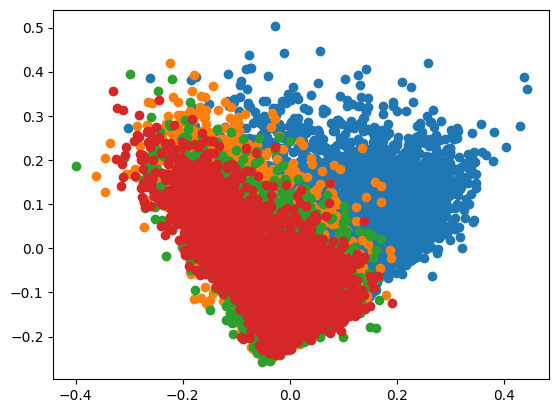

In [ ]:
plt.scatter(rap_tfidf[:, 1], rap_tfidf[:, 0], label="rap")
plt.scatter(pop_tfidf[:, 1], pop_tfidf[:, 0], label="pop")
plt.scatter(rock_tfidf[:, 1], rock_tfidf[:, 0], label="rock")
plt.scatter(country_tfidf[:, 1], country_tfidf[:, 0], label="country")

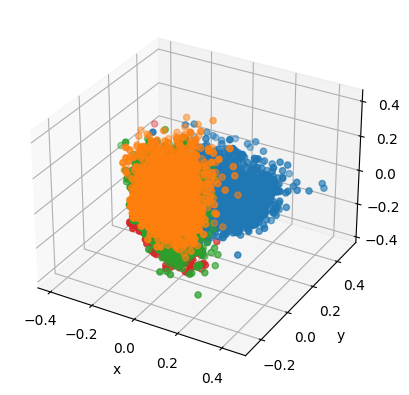

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(rap_tfidf[:, 1], rap_tfidf[:, 0], rap_tfidf[:, 2], label="rap")
ax.scatter(pop_tfidf[:, 1], pop_tfidf[:, 0], pop_tfidf[:, 2], label="pop")
ax.scatter(rock_tfidf[:, 1], rock_tfidf[:, 0], rock_tfidf[:, 2], label="rock")
ax.scatter(country_tfidf[:, 1], country_tfidf[:, 0], country_tfidf[:, 2], label="country")

### Multinomial Naive Byes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = mnb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6766712141882674


In [ ]:
mnb_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
mnb_report

,precision,recall,f1-score,support
country,0.603859,0.962025,0.741980,553.000000
pop,0.836735,0.239300,0.372163,514.000000
rap,0.680751,0.981387,0.803881,591.000000
rock,0.793103,0.467652,0.588372,541.000000
accuracy,0.676671,0.676671,0.676671,0.676671
macro avg,0.728612,0.662591,0.626599,2199.000000
weighted avg,0.725516,0.676671,0.634384,2199.000000


In [ ]:
cv = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(mnb_classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f' % (np.max(scores)))

Accuracy: 0.717


### K Nearest Neighbour

In [ ]:
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5757162346521146


In [ ]:
knn_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
knn_report

,precision,recall,f1-score,support
country,0.588235,0.705244,0.641447,553.000000
pop,0.443299,0.501946,0.470803,514.000000
rap,0.705882,0.791878,0.746411,591.000000
rock,0.515464,0.277264,0.360577,541.000000
accuracy,0.575716,0.575716,0.575716,0.575716
macro avg,0.563220,0.569083,0.554810,2199.000000
weighted avg,0.568073,0.575716,0.560670,2199.000000


In [ ]:
scores = cross_val_score(knn_classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f' % (np.max(scores)))

Accuracy: 0.602


### Support Vector Machine

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8049113233287858


In [ ]:
svc_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
svc_report

,precision,recall,f1-score,support
country,0.817726,0.884268,0.849696,553.000000
pop,0.716567,0.698444,0.707389,514.000000
rap,0.947273,0.881557,0.913234,591.000000
rock,0.729091,0.741220,0.735105,541.000000
accuracy,0.804911,0.804911,0.804911,0.804911
macro avg,0.802664,0.801372,0.801356,2199.000000
weighted avg,0.807091,0.804911,0.805318,2199.000000


In [ ]:
scores = cross_val_score(svm_classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f' % (np.max(scores)))

Accuracy: 0.833


#### Comparison

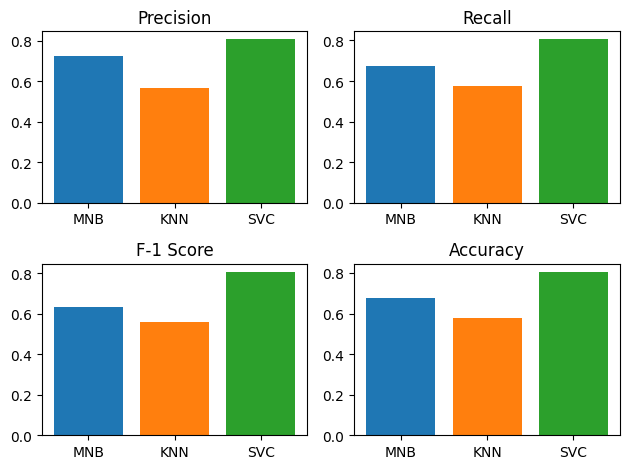

In [ ]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].set_title("Precision")
axs[0, 0].bar("MNB", mnb_report["precision"]["weighted avg"])
axs[0, 0].bar("KNN", knn_report["precision"]["weighted avg"])
axs[0, 0].bar("SVC", svc_report["precision"]["weighted avg"])

axs[0, 1].set_title("Recall")
axs[0, 1].bar("MNB", mnb_report["recall"]["weighted avg"])
axs[0, 1].bar("KNN", knn_report["recall"]["weighted avg"])
axs[0, 1].bar("SVC", svc_report["recall"]["weighted avg"])

axs[1, 0].set_title("F-1 Score")
axs[1, 0].bar("MNB", mnb_report["f1-score"]["weighted avg"])
axs[1, 0].bar("KNN", knn_report["f1-score"]["weighted avg"])
axs[1, 0].bar("SVC", svc_report["f1-score"]["weighted avg"])

axs[1, 1].set_title("Accuracy")
axs[1, 1].bar("MNB", mnb_report["support"]["accuracy"])
axs[1, 1].bar("KNN", knn_report["support"]["accuracy"])
axs[1, 1].bar("SVC", svc_report["support"]["accuracy"])

fig.tight_layout()